In [3]:
import os
import matplotlib.pyplot as plt
import pandas as pd

In [49]:
def plot_robot_status(basedir):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    data = []
    labels = []
    
    for dir in os.listdir(basedir):
        if not os.path.isdir(os.path.join(basedir, dir)):
            continue
        
        df = pd.read_csv(os.path.join(basedir, dir, 'robot_status.csv'))
        df["diff"] = abs(df["charging"] - df["operating"])
        
        ax1.plot(df["epoch"], df["diff"], label=dir)
        data.append(df["diff"])
        labels.append(dir)
        
    ax2.boxplot(data)
    ax2.set_xticklabels(labels)
    fig.set_figheight(10)
    fig.set_figwidth(20)
    fig.legend()
    fig.show()
        
        

In [46]:
def plot_robot_operation_time(basedir):
    fig, ax = plt.subplots()
    
    for dir in os.listdir(basedir):
        if not os.path.isdir(os.path.join(basedir, dir)):
            continue
        
        df = pd.read_csv(os.path.join(basedir, dir, 'simulation_stats.csv'))
        
        cum = 0
        for i in range(int(df["n_robot"])):
            cum += df["robot_" + str(i) + "_operation_time"]
        
        ax.barh(dir, cum)
        ax.text(cum, dir, str(int(cum)))

    fig.set_figheight(10)
    fig.set_figwidth(15)
    fig.legend()
    fig.show()

No handles with labels found to put in legend.


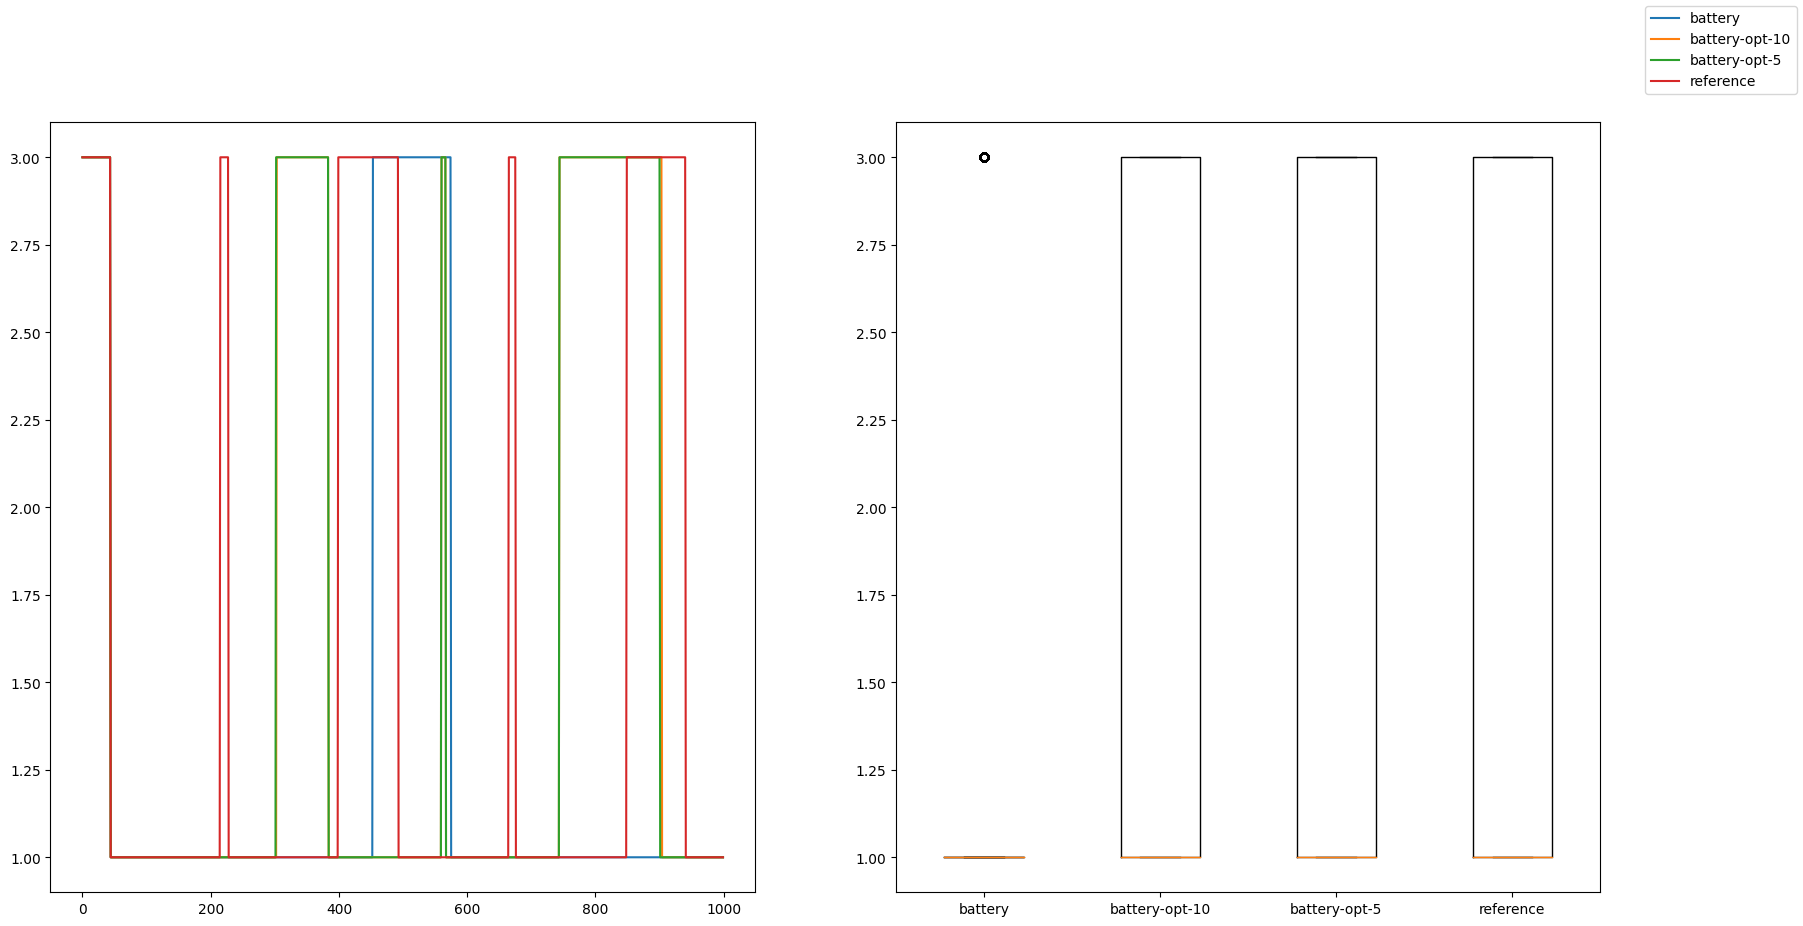

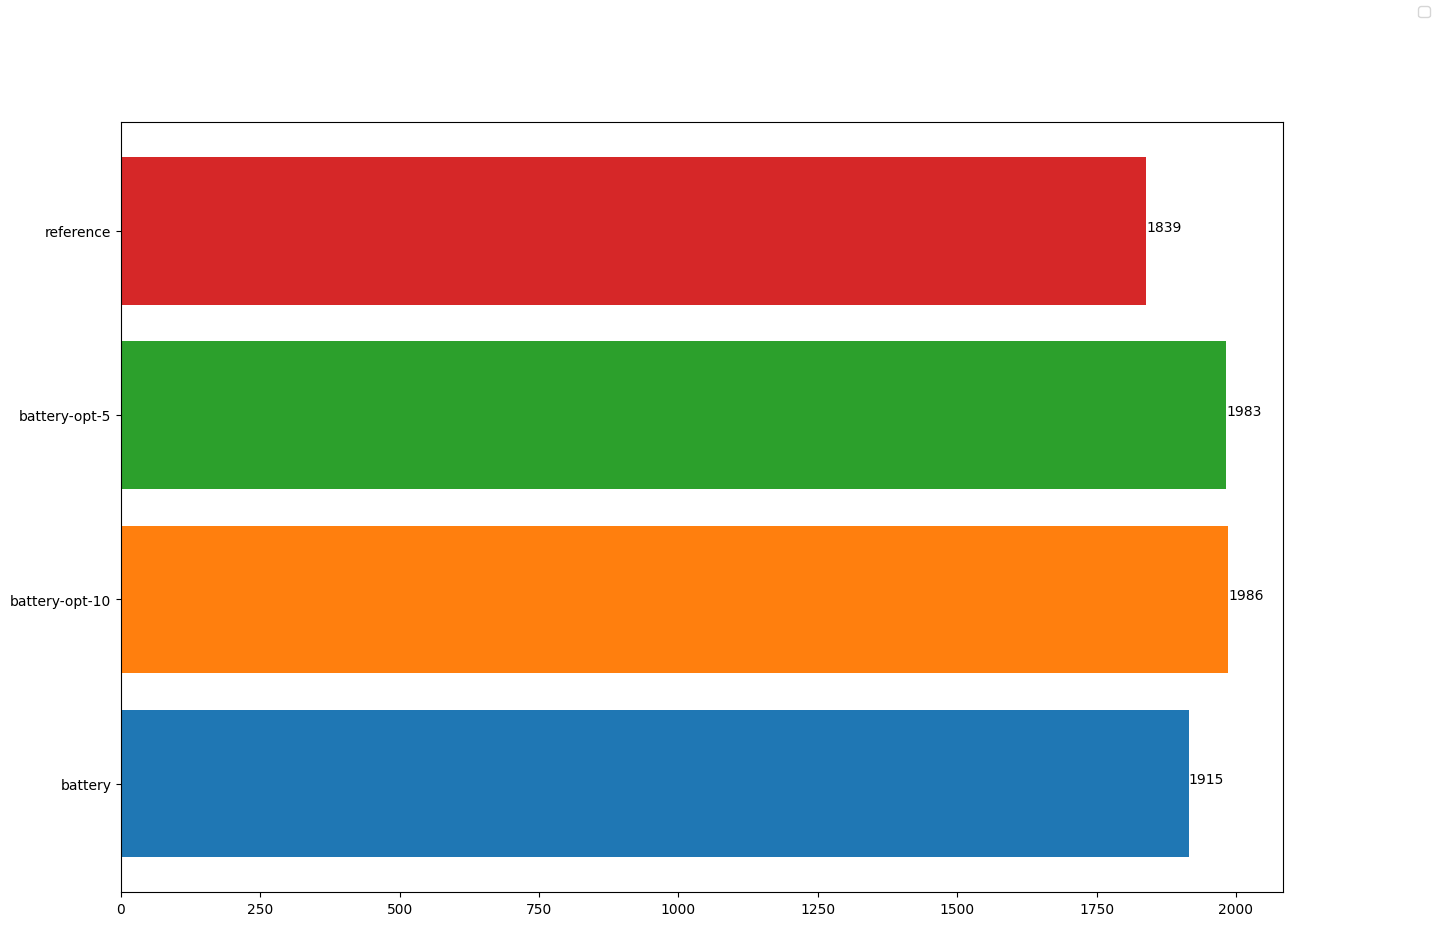

In [83]:
basedir = "../res"

plot_robot_status(basedir)
plot_robot_operation_time(basedir)